# Evaluation with Simulation

## RUN THIS FOR PREDICTION, FOR PLOTS DIRECTLY RUN BELOW

In [1]:
import tensorflow as tf
import json
import numpy as np
import seaborn as sns
from src import preparedata
from src import transformermodel
from src import traintransformer
import matplotlib.pyplot as plt
import sklearn

print("json imported")

print("json imported")

2023-08-21 11:15:58.631888: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 11:16:06.792666: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-21 11:16:18.345047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dahala/miniconda3/envs/dlashok/lib/
2023-08-21 11:16:18.346116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_

json imported


In [2]:
params = json.load(open("params/paramsANN.json", "r"))
dataset = preparedata.readTransformerData(params["dataprepinargs"])
dataset.preparedata()

In [4]:
# predict with onlyPGV
model = tf.keras.models.load_model("checkpoints/onlypgv")
preds = model.predict(np.nan_to_num(dataset.Xc[:, -1], 0), batch_size=4)
np.save("Data/p_onlypgv.npy", preds)

2023-08-21 11:21:31.309155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 11:21:36.898749: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15390 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:02:00.0, compute capability: 6.0


12433/12433 [==============================] - 34s 2ms/step


In [5]:
# predict with onlyterrian
model = tf.keras.models.load_model("checkpoints/onlyterrian")
preds = model.predict(np.nan_to_num(dataset.Xc[:, :-1], 0), batch_size=4)
np.save("Data/onlyterrian.npy", preds)

12433/12433 [==============================] - 31s 2ms/step


In [6]:
# predict with terrianandpgv
model = tf.keras.models.load_model("checkpoints/terrianandpgv")
preds = model.predict(np.nan_to_num(dataset.Xc, 0), batch_size=4)
np.save("Data/terrianandpgv.npy", preds)

12433/12433 [==============================] - 30s 2ms/step


In [7]:
# predict with onlytimeseries
model = tf.keras.models.load_model("checkpoints/onlytimeseries")
preds = model.predict([dataset.Xt, np.nan_to_num(dataset.Xc[:, :-1], 0)], batch_size=4)
np.save("Data/onlytimeseries.npy", preds)

2023-08-21 11:24:40.031888: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3886697880 exceeds 10% of free system memory.
2023-08-21 11:24:45.682509: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3886697880 exceeds 10% of free system memory.
2023-08-21 11:24:57.563668: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-08-21 11:25:16.366635: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512


    4/12433 [..............................] - ETA: 4:40    

2023-08-21 11:25:16.931068: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


12433/12433 [==============================] - 386s 29ms/step


In [ ]:
# predict with timeseriesandconstant
model = tf.keras.models.load_model("checkpoints/timeseriesandconstant")
preds = model.predict([dataset.Xt, np.nan_to_num(dataset.Xc[:, :-1], 0)], batch_size=4)
np.save("Data/timeseriesandconstant.npy", preds)

In [ ]:
np.save("Data/Y_test.npy", dataset.Y)

## RUN FROM BELOW FOR PLOTS

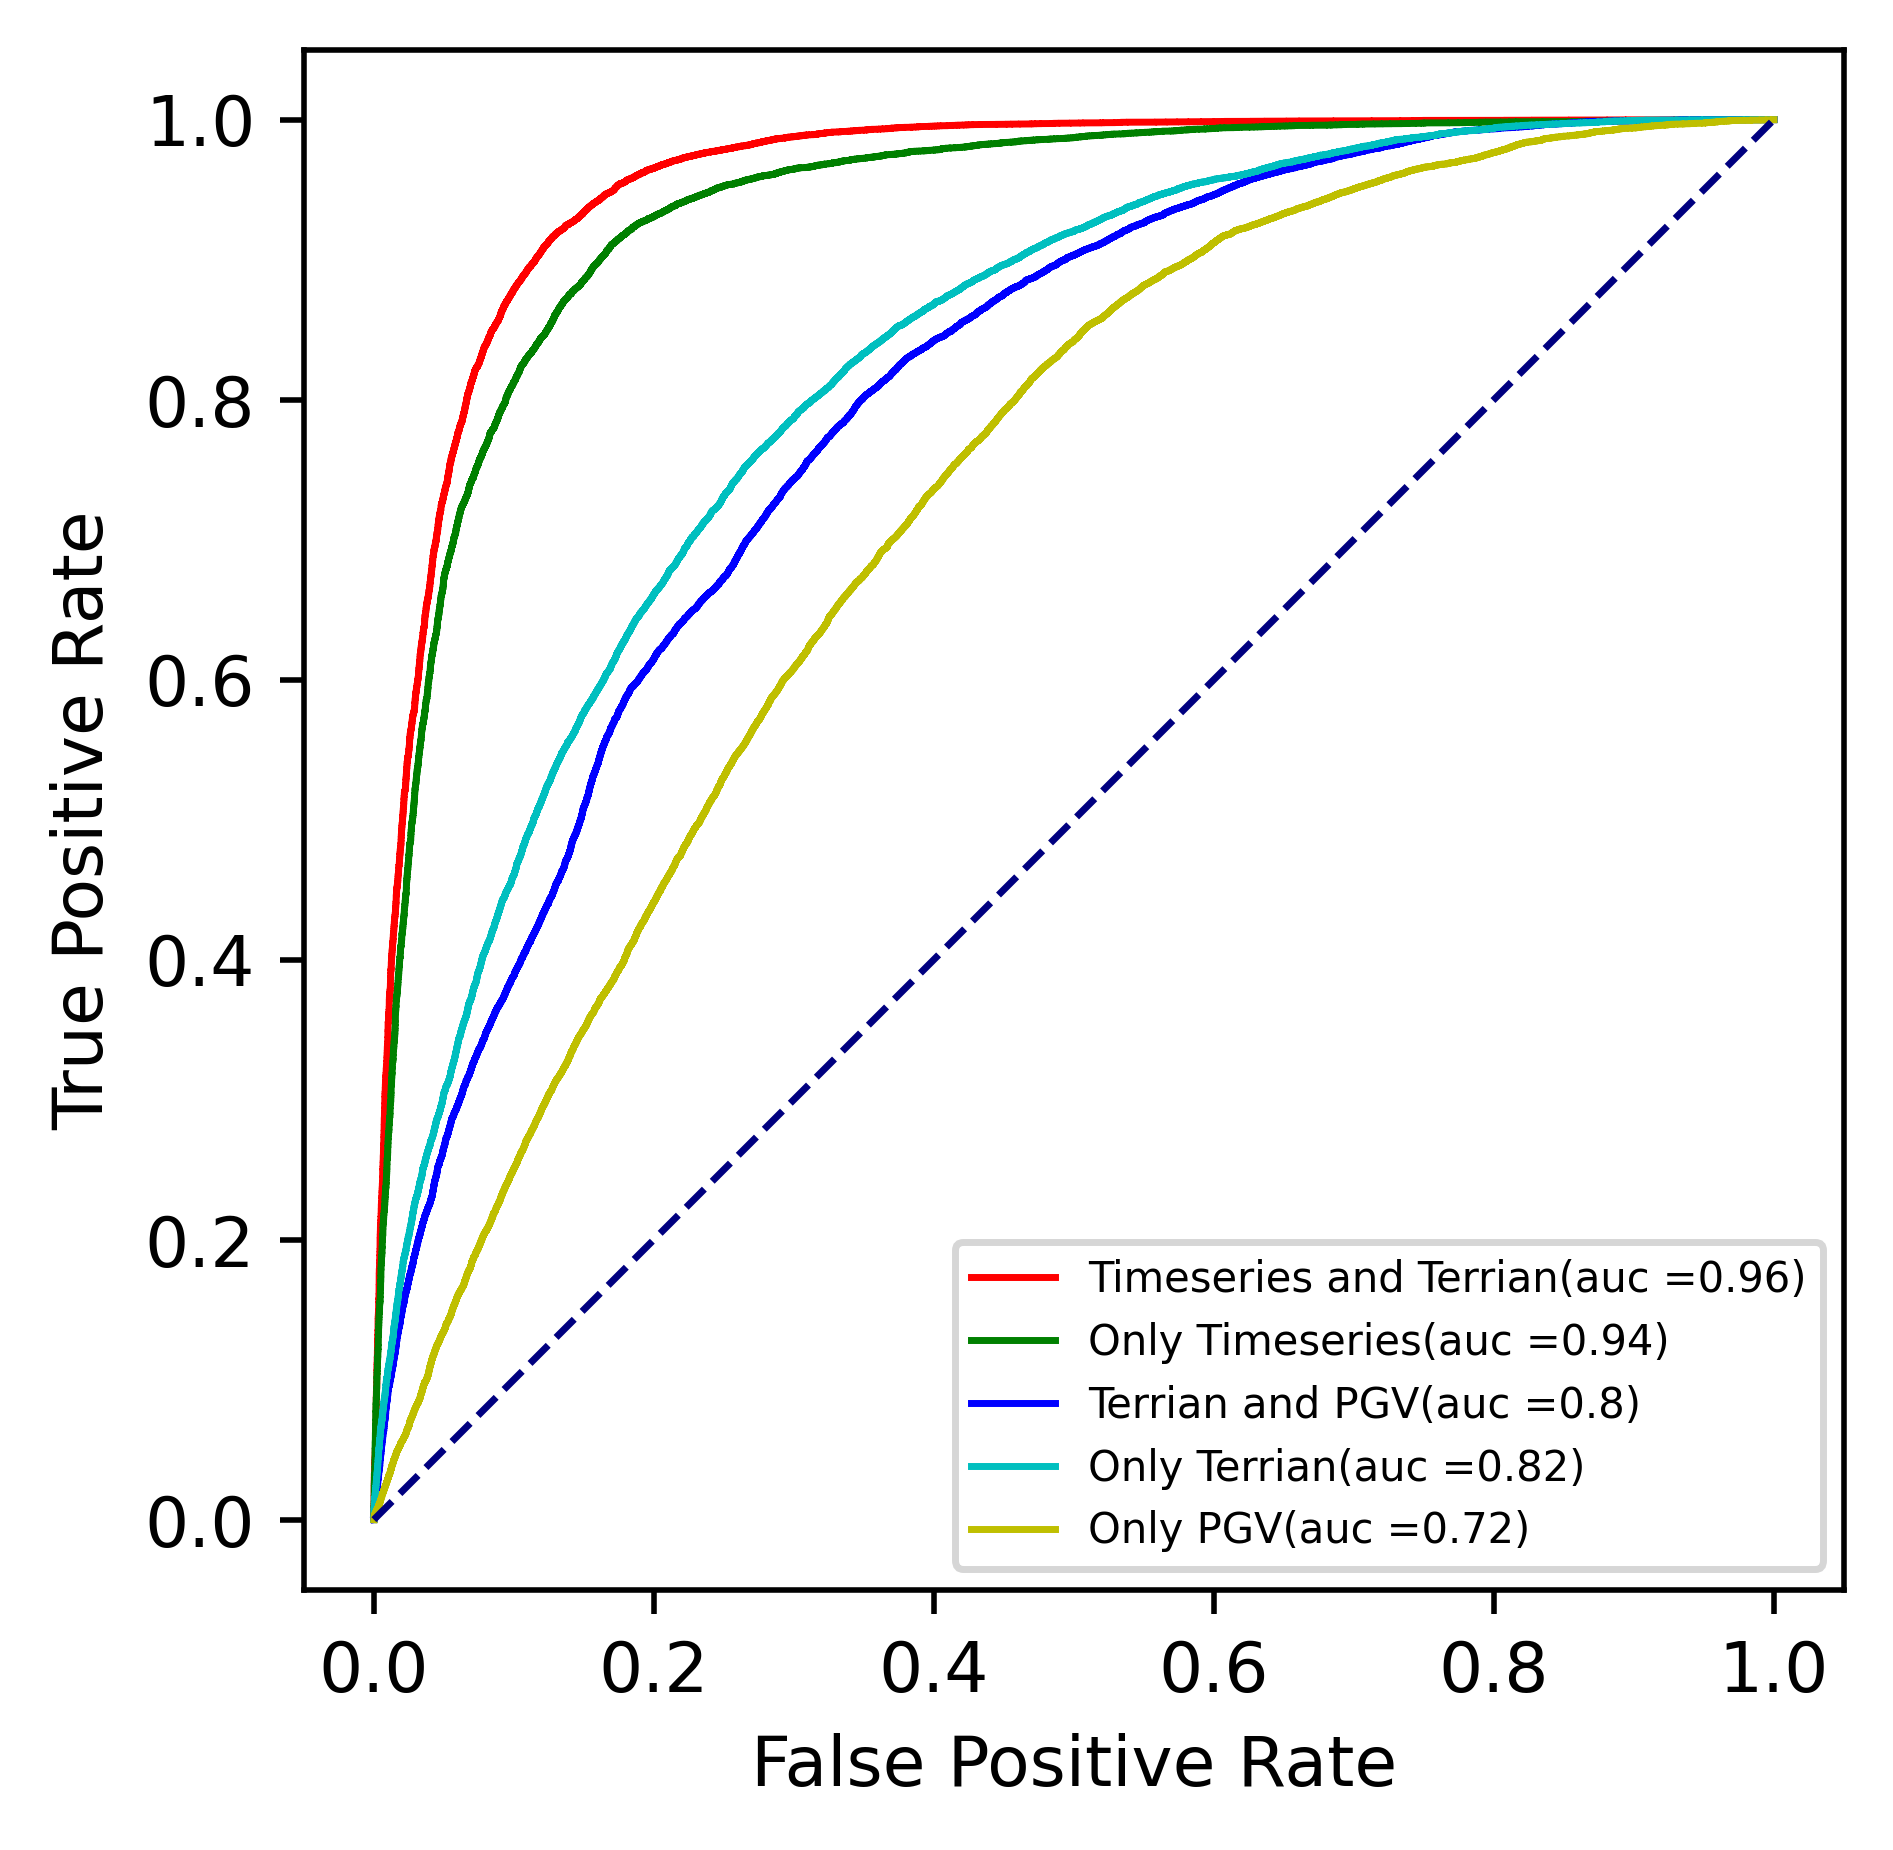

In [1]:
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=500)
lw = 1
# load all the data and make plot
preds = [
    "Data/timeseriesandconstant.npy",
    "Data/onlytimeseries.npy",
    "Data/terrianandpgv.npy",
    "Data/onlyterrian.npy",
    "Data/p_onlypgv.npy",
]
names = [
    "Timeseries and Terrian",
    "Only Timeseries",
    "Terrian and PGV",
    "Only Terrian",
    "Only PGV",
]
colors = ["r", "g", "b", "c", "y"]
for i in range(5):
    Ydata = np.load("Data/Y_test.npy")
    pred = np.load(preds[i])
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(Ydata, pred)
    auc = sklearn.metrics.auc(fpr, tpr)
    acc = sklearn.metrics.balanced_accuracy_score(Ydata, pred > 0.5)
    plt.plot(
        fpr,
        tpr,
        color=colors[i],
        lw=lw,
        label=f"{names[i]}(auc ={ round(auc,2)})",
    )

ax = plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("ROC Curve Landslide Classification")
# plt.text(0.38, 0.11,"Balanced Accuracy=%0.2f" % acc)
plt.legend(loc="lower right", prop={"size": 6})
plt.axis("square")
plt.savefig("Plots/roc.pdf")
plt.show()

In [2]:
# load all the data and make plot
preds = [
    "Data/timeseriesandconstant.npy",
    "Data/onlytimeseries.npy",
    "Data/terrianandpgv.npy",
    "Data/onlyterrian.npy",
    "Data/p_onlypgv.npy",
]
names = [
    "Timeseries and Terrian",
    "Only Timeseries",
    "Terrian and PGV",
    "Only Terrian",
    "Only PGV",
]
colors = ["r", "g", "b", "c", "y"]

f1 = []
acc = []
auc = []
iou = []

for i in range(5):
    Ydata = np.load("Data/Y_test.npy")
    pred = np.load(preds[i])
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(Ydata, pred)
    auc.append(sklearn.metrics.auc(fpr, tpr))
    acc.append(sklearn.metrics.balanced_accuracy_score(Ydata, pred > 0.5))
    iou.append(sklearn.metrics.jaccard_score(Ydata, pred > 0.5))
    f1.append(sklearn.metrics.f1_score(Ydata, pred > 0.5))

In [3]:
import pandas as pd

df = pd.DataFrame()
df["AUC"] = auc
df["ACC"] = acc
df["IOU"] = iou
df["F1"] = f1
df["Experiment"] = names
dfm = df.melt("Experiment", var_name="Metric", value_name="Score")
# df['name']=["auc","acc","iou","f1"]

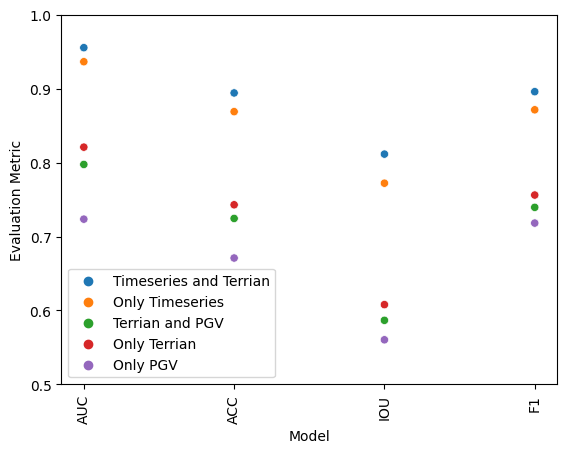

In [6]:
sns.scatterplot(x="Metric", y="Score", hue="Experiment", data=dfm)
plt.xticks(rotation=90)

plt.ylim([0.5, 1.0])
plt.xlabel("Model")
plt.ylabel("Evaluation Metric")
# plt.text(0.38, 0.11,"Balanced Accuracy=%0.2f" % acc)
plt.legend(loc="lower left", prop={"size": 10})
# plt.axis('square')
plt.savefig("Plots/acc_scores.pdf", dpi=500)
plt.show()

In [19]:
# locations
import geopandas as gpd

locations = gpd.read_file("Data/stations.shp")

In [ ]:
preds = [
    "Data/timeseriesandconstant.npy",
    "Data/onlytimeseries.npy",
    "Data/terrianandpgv.npy",
    "Data/onlyterrian.npy",
    "Data/p_onlypgv.npy",
]
names = ["probTsTr", "probTs", "probPgTr", "probTr", "probPg"]
colors = ["r", "g", "b", "c", "y"]

f1 = []
acc = []
auc = []
iou = []

for i in range(5):
    Ydata = np.load("Data/Y_test.npy")
    pred = np.load(preds[i])
    name = names[i]
    locations[name] = pred
locations.to_file("Data/allProbs.gpkg", driver="GPKG")

In [80]:
# save all properly predicted to timeseries enabled ones

changed = (TP_pred < 0.5) & (Ydata == 1)  # &((TT_pred>=0.5) & (Ydata==1)))
allpred = ((TP_pred >= 0.5) & (Ydata == 1)) & ((TT_pred >= 0.5) & (Ydata == 1))
np.save("Data/changed_preds.npy", changed)
np.save("Data/both_preds.npy", allpred)

locations[changed].to_file("Data/changed_preds.gpkg", driver="GPKG")
locations[allpred].to_file("Data/both_preds.gpkg", driver="GPKG")

# Evaluation with USGS, Arias Intensity and Filtered Data (Benchmarking)

## Run the evaluation

In [12]:
usgsdatas = ["PGV2020", "PGA2020", "PGV2015", "PGA2015"]
params = json.load(open("params/paramsUSGS.json", "r"))
for usgsdata in usgsdatas:
    print(f" __________________________{usgsdata}______________________")
    params["dataprepinargs"]["usgsmetric"] = f"Data/{usgsdata}.npy"

    dataset = preparedata.readTransformerData(params["dataprepinargs"])
    dataset.preparedata()
    model = tf.keras.models.load_model(f"checkpoints/USGS{usgsdata}")
    pred = model.predict(np.nan_to_num(dataset.Xc_test, 0), batch_size=4)

    Ydata = dataset.Y_test

    fpr, tpr, thresholds = sklearn.metrics.roc_curve(Ydata, pred)
    print("AUC: ", sklearn.metrics.auc(fpr, tpr))
    print("ACC: ", sklearn.metrics.balanced_accuracy_score(Ydata, pred > 0.5))
    print("IOU: ", sklearn.metrics.jaccard_score(Ydata, pred > 0.5))
    print("F1: ", sklearn.metrics.f1_score(Ydata, pred > 0.5))

 __________________________PGV2020______________________
1244/1244 [==============================] - 6s 5ms/step
AUC:  0.8322663519427441
ACC:  0.7633328189305404
IOU:  0.6401826484018265
F1:  0.7806236080178174
 __________________________PGA2020______________________
1244/1244 [==============================] - 6s 5ms/step
AUC:  0.879635974290213
ACC:  0.796162393402962
IOU:  0.6743515850144092
F1:  0.8055077452667814
 __________________________PGV2015______________________
1244/1244 [==============================] - 6s 5ms/step
AUC:  0.855789441672385
ACC:  0.7694271170505762
IOU:  0.6445336627547869
F1:  0.7838497652582159
 __________________________PGA2015______________________
1244/1244 [==============================] - 6s 5ms/step
AUC:  0.8778723653437457
ACC:  0.7899524355354626
IOU:  0.6666666666666666
F1:  0.8


In [13]:
print(f" __________________________Arias Intensity______________________")
params = json.load(open("params/paramsArias.json", "r"))

dataset = preparedata.readTransformerData(params["dataprepinargs"])
dataset.preparedata()
model = tf.keras.models.load_model(f"checkpoints/AriasIntensity")
pred = model.predict(np.nan_to_num(dataset.Xc_test, 0), batch_size=4)

Ydata = dataset.Y_test

fpr, tpr, thresholds = sklearn.metrics.roc_curve(Ydata, pred)
print("AUC: ", sklearn.metrics.auc(fpr, tpr))
print("ACC: ", sklearn.metrics.balanced_accuracy_score(Ydata, pred > 0.5))
print("IOU: ", sklearn.metrics.jaccard_score(Ydata, pred > 0.5))
print("F1: ", sklearn.metrics.f1_score(Ydata, pred > 0.5))

 __________________________Arias Intensity______________________
1244/1244 [==============================] - 6s 5ms/step
AUC:  0.8155597462667784
ACC:  0.7294246970927831
IOU:  0.5490591397849462
F1:  0.7088937093275488


In [3]:
print(f" __________________________Lower Frequency______________________")
params = json.load(open("params/paramsFilter.json", "r"))

dataset = preparedata.readTransformerData(params["dataprepinargs"])
dataset.preparedata()
model = tf.keras.models.load_model(f"checkpoints/FilteredSignal")
pred = model.predict((dataset.Xt_test, np.nan_to_num(dataset.Xc_test, 0)), batch_size=4)

Ydata = dataset.Y_test

fpr, tpr, thresholds = sklearn.metrics.roc_curve(Ydata, pred)
print("AUC: ", sklearn.metrics.auc(fpr, tpr))
print("ACC: ", sklearn.metrics.balanced_accuracy_score(Ydata, pred > 0.5))
print("IOU: ", sklearn.metrics.jaccard_score(Ydata, pred > 0.5))
print("F1: ", sklearn.metrics.f1_score(Ydata, pred > 0.5))

 __________________________Lower Frequency______________________
(49730, 6513, 3)
(49730, 6513, 3)
1244/1244 [==============================] - 33s 26ms/step
AUC:  0.9458576501886304
ACC:  0.8840708381174411
IOU:  0.7978351955307262
F1:  0.8875509807729657


In [4]:
print(f" __________________________Only Terrain______________________")
params = json.load(open("params/paramsTerrain.json", "r"))

dataset = preparedata.readTransformerData(params["dataprepinargs"])
dataset.preparedata()
model = tf.keras.models.load_model(f"checkpoints/onlyTerrain")
pred = model.predict(np.nan_to_num(dataset.Xc_test, 0), batch_size=4)

Ydata = dataset.Y_test

fpr, tpr, thresholds = sklearn.metrics.roc_curve(Ydata, pred)
print("AUC: ", sklearn.metrics.auc(fpr, tpr))
print("ACC: ", sklearn.metrics.balanced_accuracy_score(Ydata, pred > 0.5))
print("IOU: ", sklearn.metrics.jaccard_score(Ydata, pred > 0.5))
print("F1: ", sklearn.metrics.f1_score(Ydata, pred > 0.5))

 __________________________Only Terrain______________________
1244/1244 [==============================] - 2s 2ms/step
AUC:  0.6653643217340357
ACC:  0.6420275816954133
IOU:  0.5645747516355706
F1:  0.7216973826854576
